## Importing  Libraies 

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Import dataset

In [5]:
path=r"C:\Users\siddhesh\DataSet\hotel_bookings 2.csv"
data=pd.read_csv(path)

In [7]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


## Exploratory data analysis & Data cleaning

In [10]:
data.shape

(119390, 32)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
# conbert data['reservation_status_date'] into date time dtype
data['reservation_status_date']= pd.to_datetime(data['reservation_status_date'],dayfirst=True)

In [16]:
# describe categorical column
data.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [18]:
# disply all unique values from tha all categorical column 
for col in data.describe(include="object").columns:
    print(col)
    print(data[col].unique())
    print("--"*50)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [20]:
# null value count 
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
# handling miss value 
data.drop(["agent","company"],axis=1,inplace=True)
data.dropna(inplace=True)

In [24]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [26]:
# remove outlier from "adr" column
data=data[data['adr']<5000]

## Data Analysis and Visualization

total reservation :  118897
is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

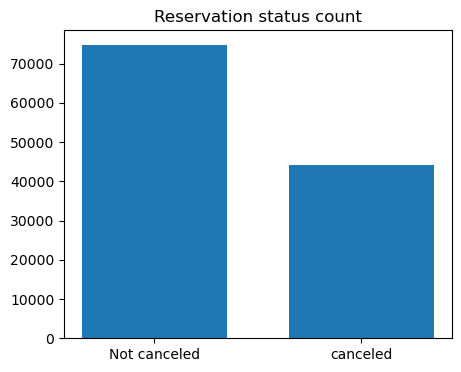

In [32]:
print("total reservation : ",data['is_canceled'].shape[0])

cancelled_perc=data['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not canceled","canceled"],data['is_canceled'].value_counts(), width=0.7)

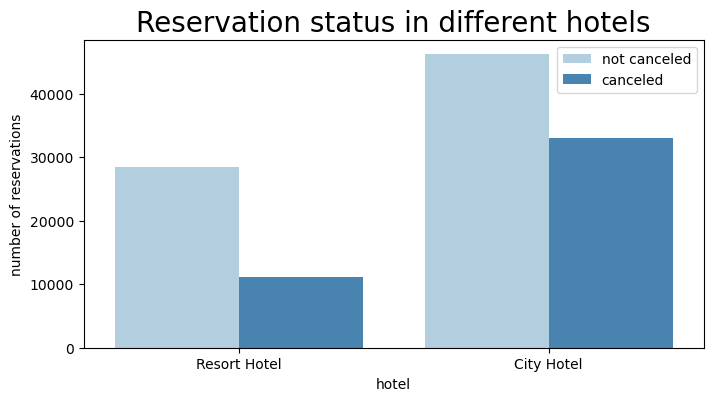

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(x='hotel',hue="is_canceled",data=data,palette='Blues')
plt.title("Reservation status in different hotels",size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend({'not canceled',"canceled"})
plt.show()

In [36]:
resort_hotel=data[data['hotel']== "Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [38]:
city_hotel=data[data['hotel']== "City Hotel"]
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [40]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[['adr']].mean()
city_hotel=city_hotel.groupby("reservation_status_date")[['adr']].mean()

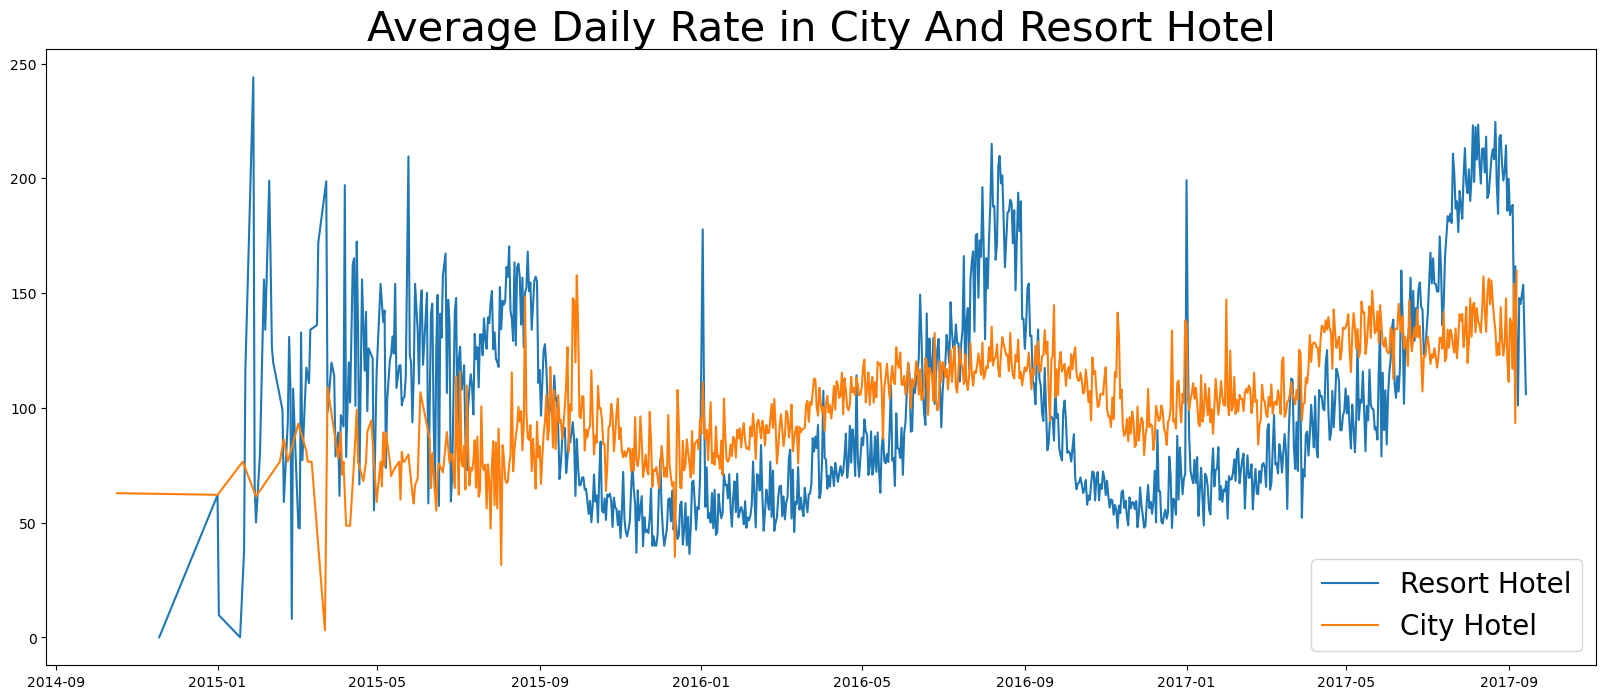

In [42]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City And Resort Hotel",fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label="Resort Hotel")
plt.plot(city_hotel.index,city_hotel['adr'],label="City Hotel")
plt.legend(fontsize=20)
plt.show()

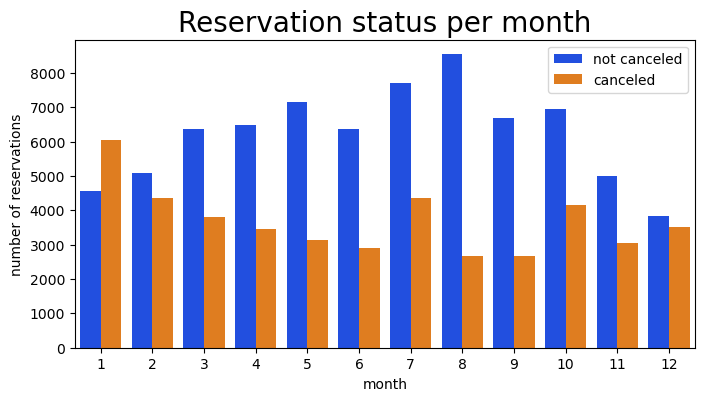

In [44]:
data['month'] = data['reservation_status_date'].dt.month
plt.figure(figsize = (8,4))
sns.countplot(x = 'month', hue = 'is_canceled', data = data, palette = 'bright')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

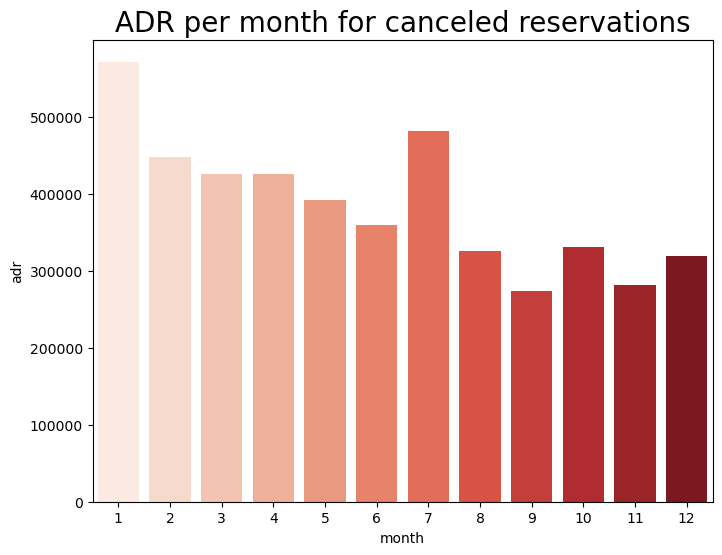

In [46]:
data['month'] = data['reservation_status_date'].dt.month
canceled_data = data[data['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='adr', data=canceled_data,palette="Reds" )
plt.title('ADR per month for canceled reservations', fontsize=20)
plt.show()

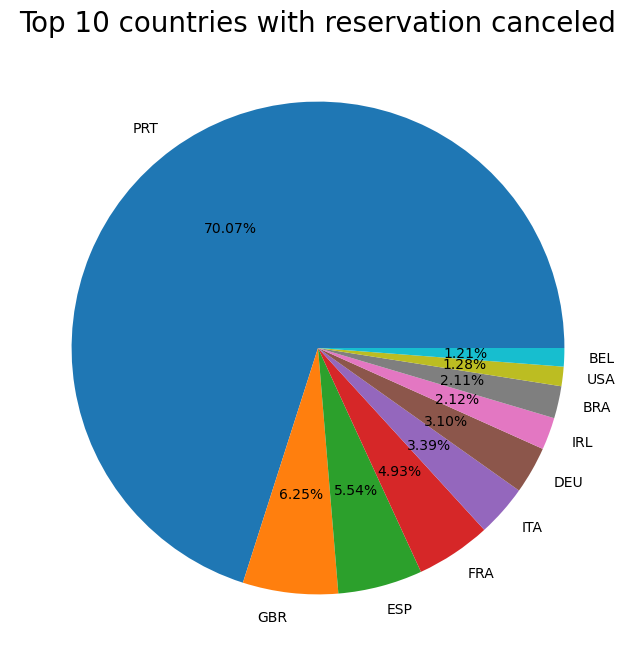

In [50]:
# canceled reservations
cancelled_data = data[data['is_canceled'] == 1]

# top 10 countries with canceled reservations
top_10_country = cancelled_data['country'].value_counts()[:10]

#  pie chart
plt.figure(figsize=(8, 8))
plt.title('Top 10 countries with reservation canceled',fontsize=20)
plt.pie(top_10_country, labels=top_10_country.index, autopct='%.2f%%')
plt.show()

In [52]:
data['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [54]:
data['market_segment'].value_counts (normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [56]:
cancelled_data['market_segment'].value_counts (normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

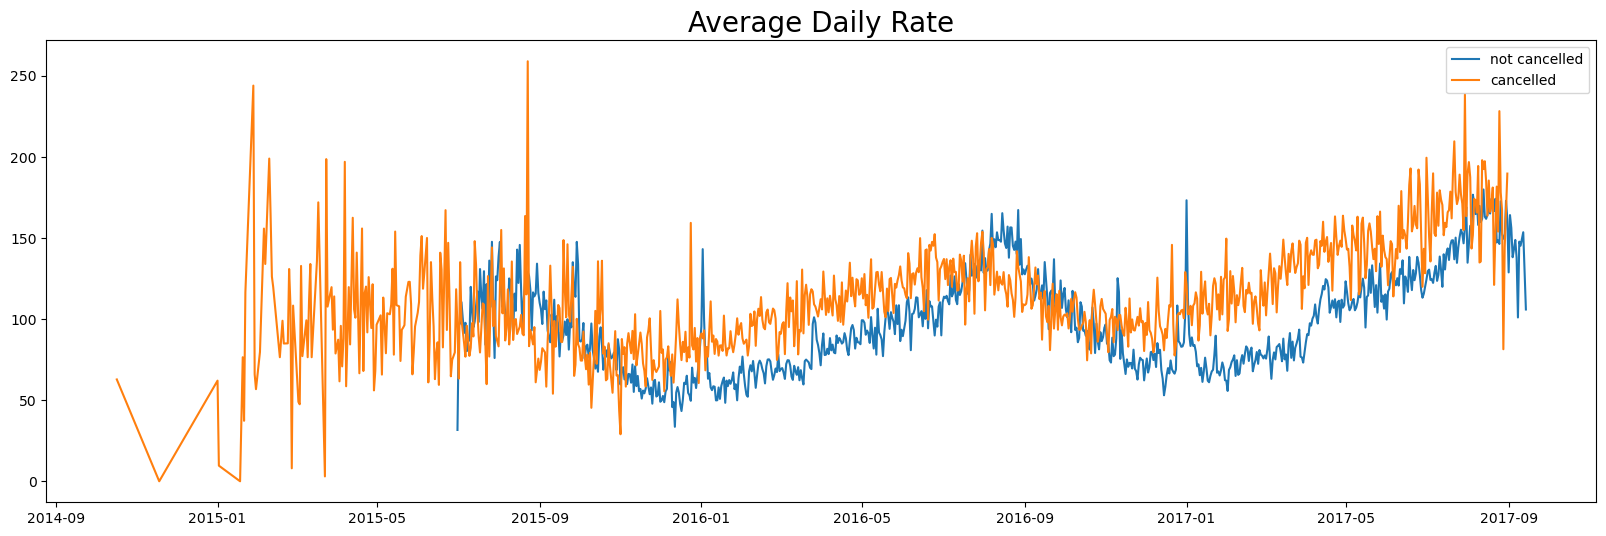

In [58]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date') [['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = data [data['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date') [['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate',fontsize=20)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled') 
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

In [60]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & ((not_cancelled_df_adr['reservation_status_date']<'2017-09'))]

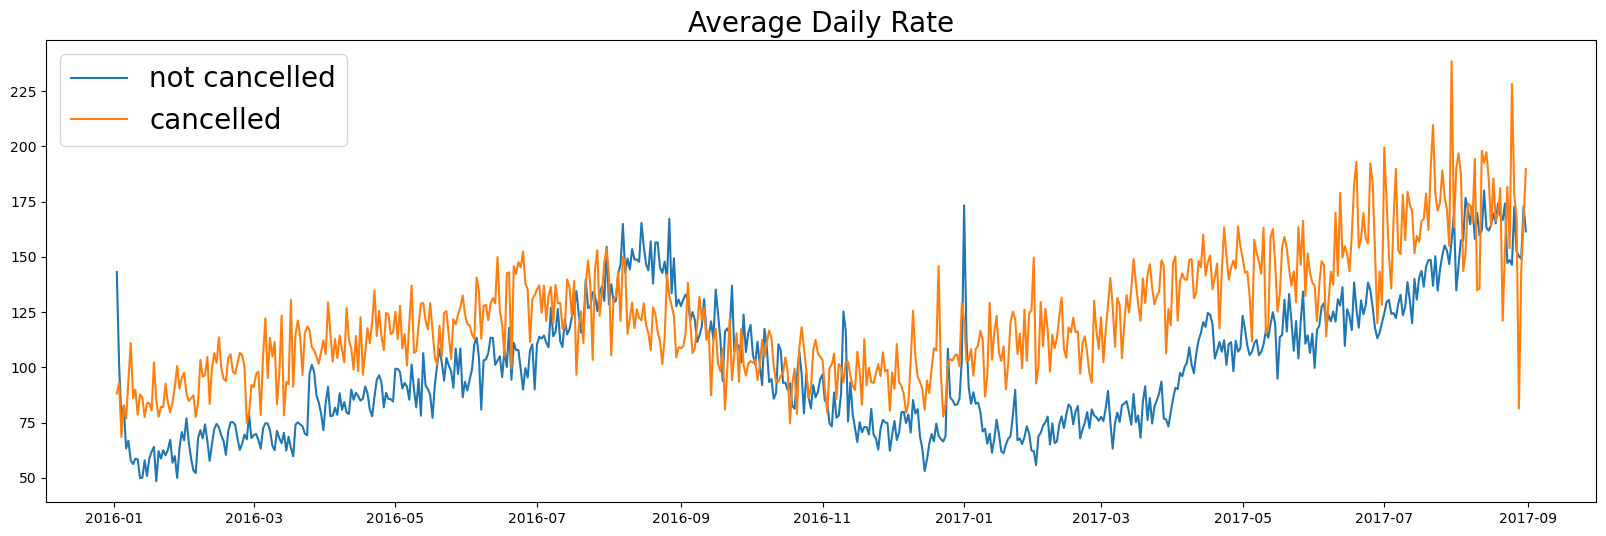

In [62]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize=20) 
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()